##Context

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at 121.61 billion dollars in 2019 and is projected to reach 1,039.03 dollars billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

##Objective

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership.

##Data Description
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

Data Dictionary:
* visitors: Average number of visitors, in millions, to the platform in the past week
* ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
* major_sports_event: Any major sports event on the day
* genre: Genre of the content
* dayofweek: Day of the release of the content
* season: Season of the release of the content
* views_trailer: Number of views, in millions, of the content trailer
* views_content: Number of first-day views, in millions, of the content

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Read the data
df = pd.read_csv('/content/drive/MyDrive/PGPDSA/ottdata.csv')
#returns first 5 rows
df.head(5)

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


## Data Overview

###1. Structure of Data

In [4]:
df.shape

(1000, 8)

###2. Type of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


###3. Missing values treatment

In [6]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

###4. Data Duplicates

In [7]:
df.duplicated().sum()

0

###5. Statistical Summary

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


###Insights


*   Number of visitors in the past week ranges from 1-2 millions
*  75% of the first-day views of the content fall within the range of 0.5 million views.
*   Ad impressions ranges from 1000 to 2000 millions.



## Exploratory Data Analysis

### Univariate Analysis

In [9]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    ax_box2.set_title(f'Distribution of {feature}')
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_title(f'Distribution of {feature}')

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 3, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    ax.set_title(f'Distribution of {feature}')
    plt.show()  # show the plot

**`visitors`**

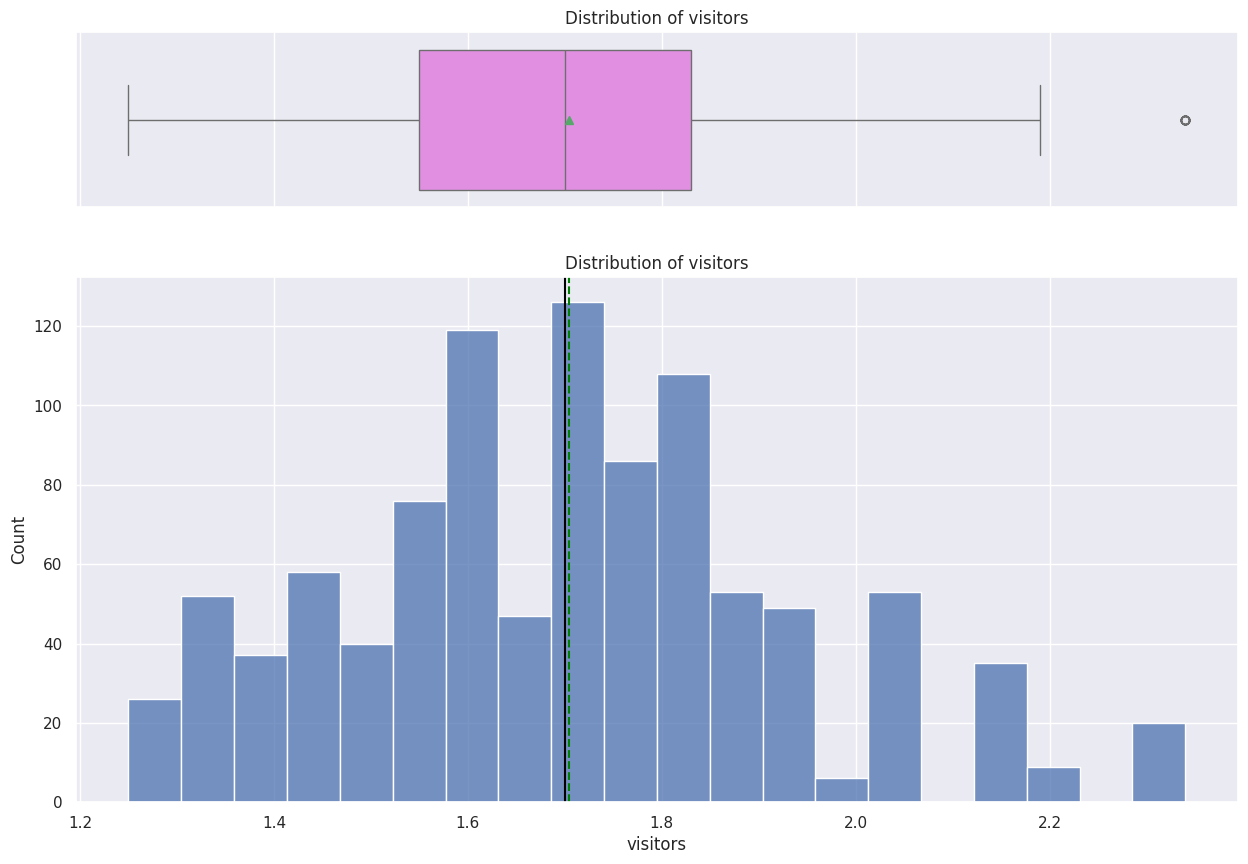

In [11]:
histogram_boxplot(df, "visitors")

**`ad_impressions`**

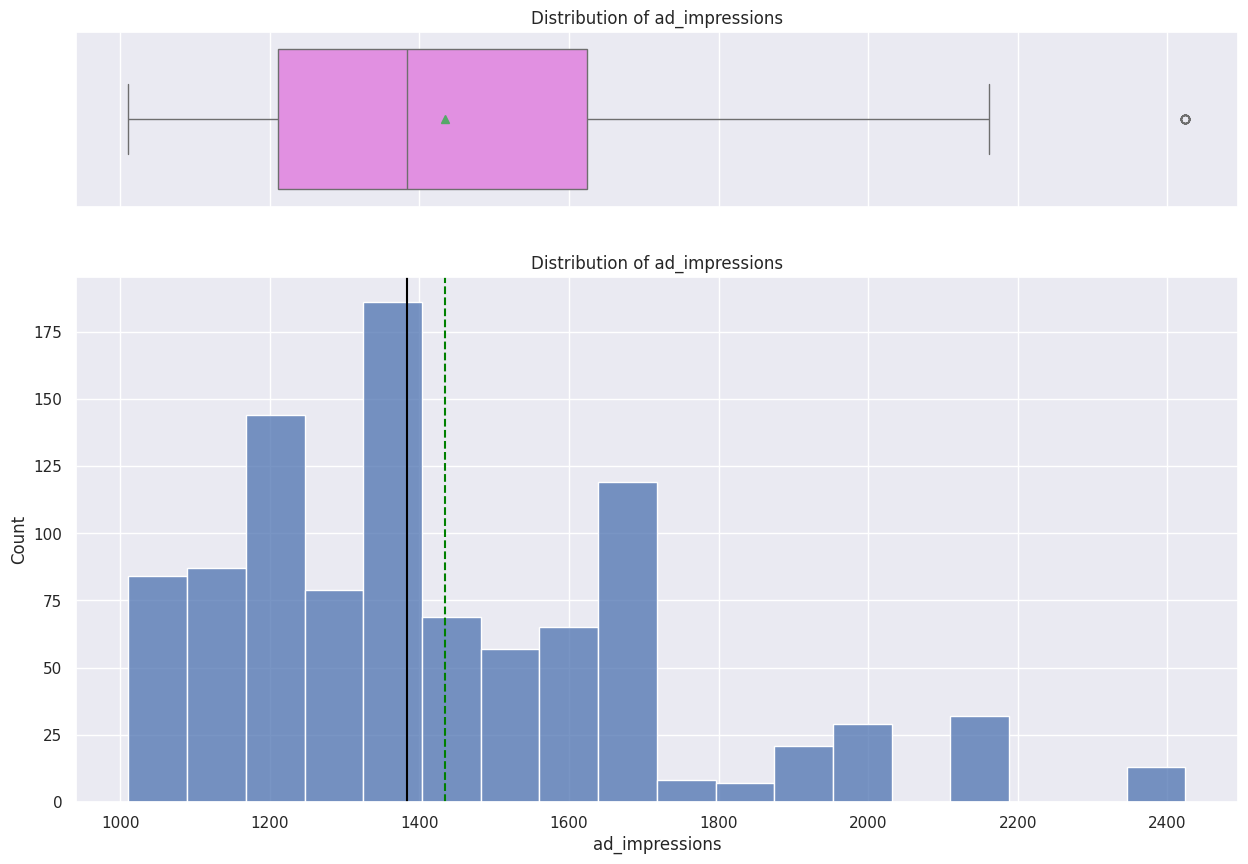

In [12]:
histogram_boxplot(df, "ad_impressions")

**`major_sports_event`**

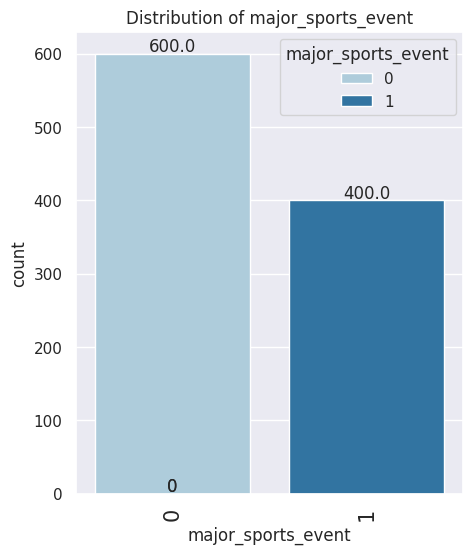

In [13]:
labeled_barplot(df, "major_sports_event")

**`dayofweek`**

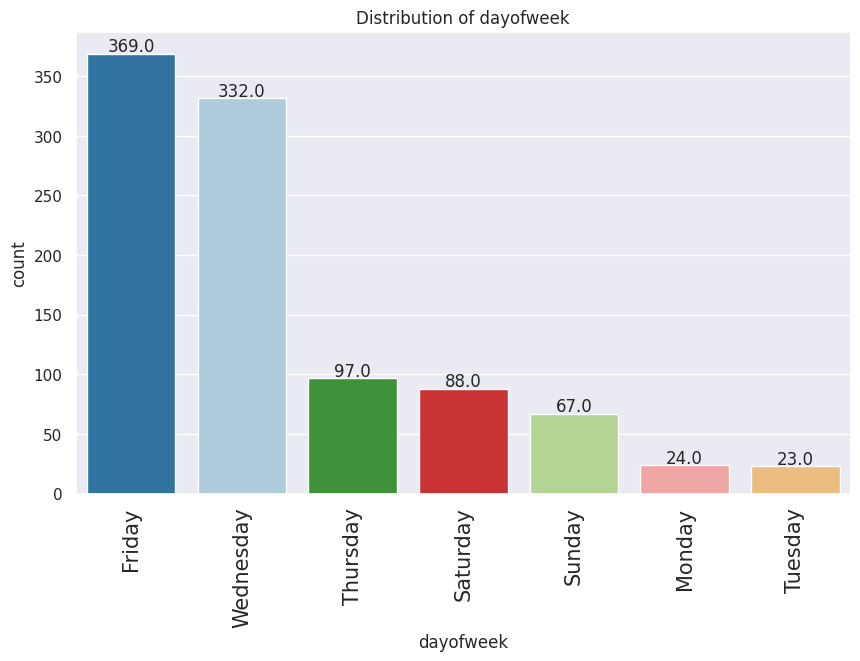

In [14]:
labeled_barplot(df, "dayofweek")

**`season`**

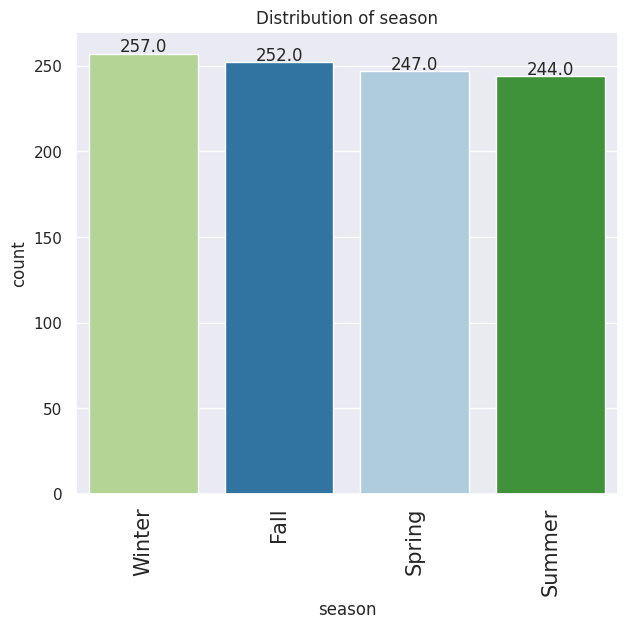

In [15]:
labeled_barplot(df, "season")

**`views_trailer`**

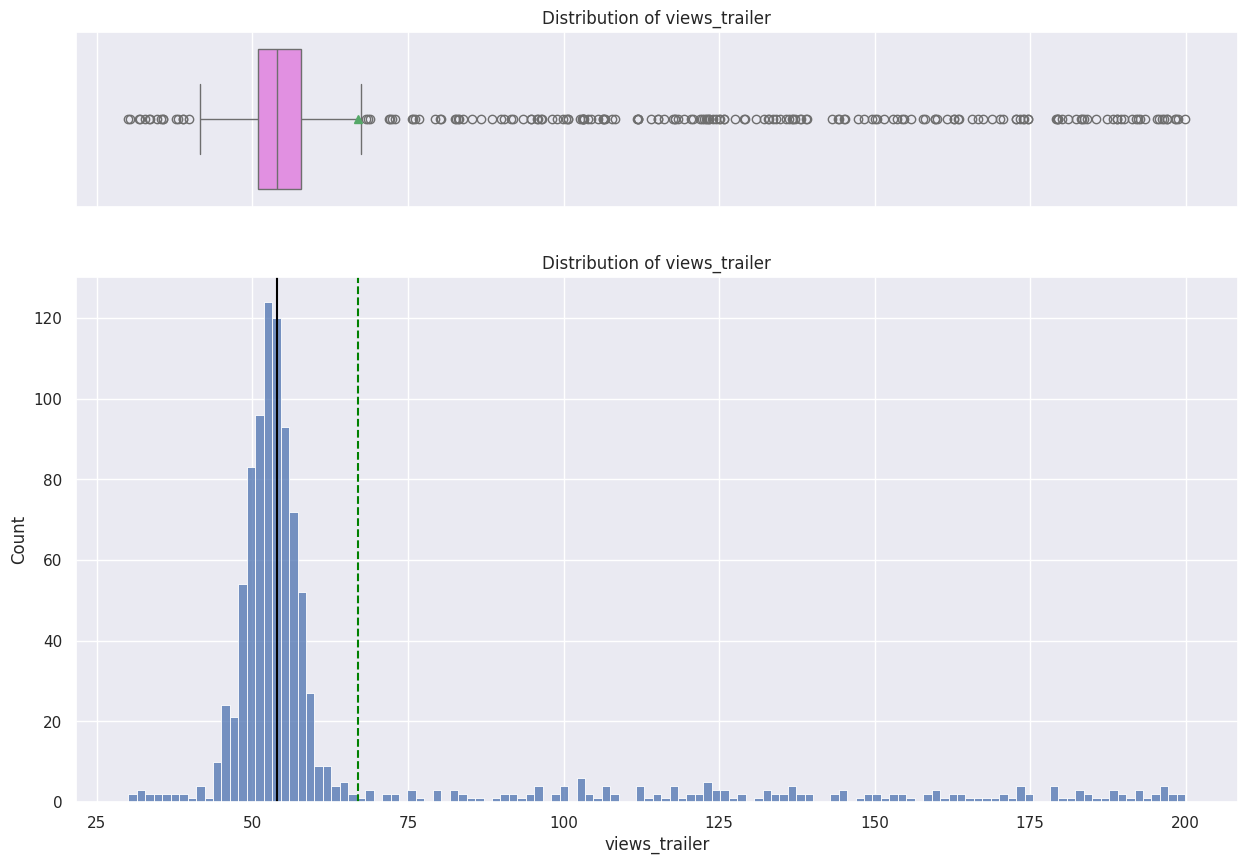

In [16]:
histogram_boxplot(df, "views_trailer")

### **Key Question 1: What does the distribution of content views look like?**

**`views_content`**

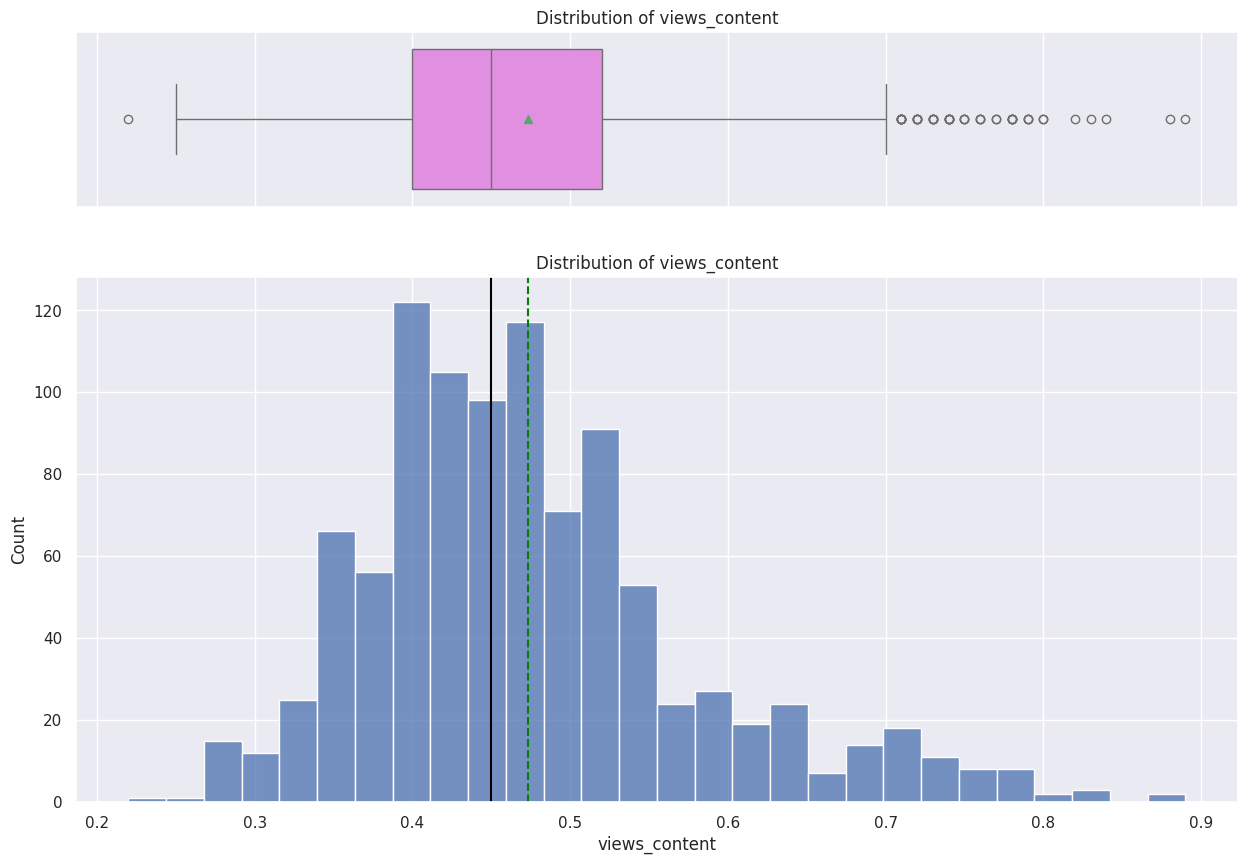

In [17]:
histogram_boxplot(df, "views_content")

###**Key Question 2: What does the distribution of genres look like?**

**`genre`**

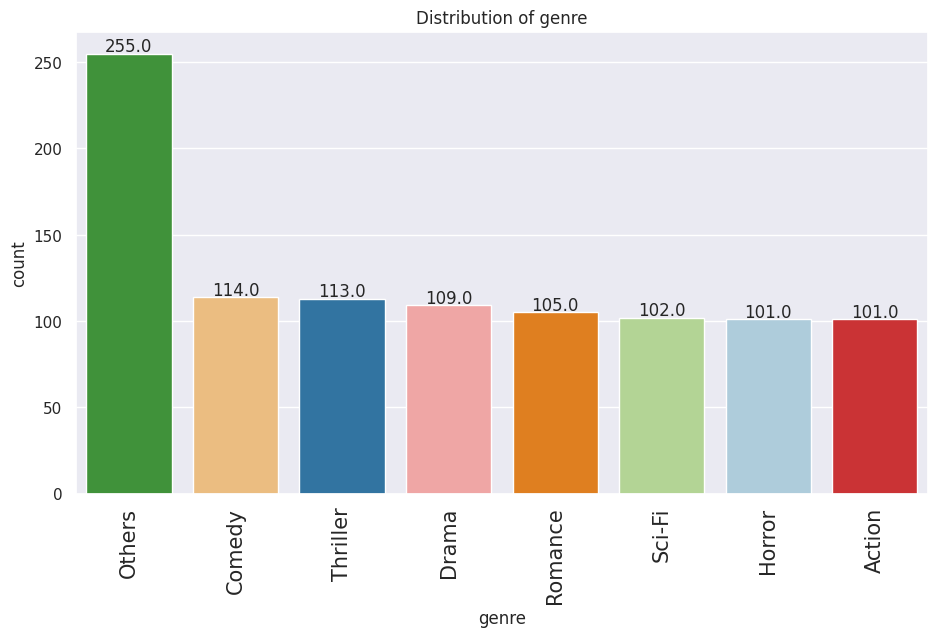

In [18]:
labeled_barplot(df, "genre")

## Bivariate Analysis

**Correlation Check**

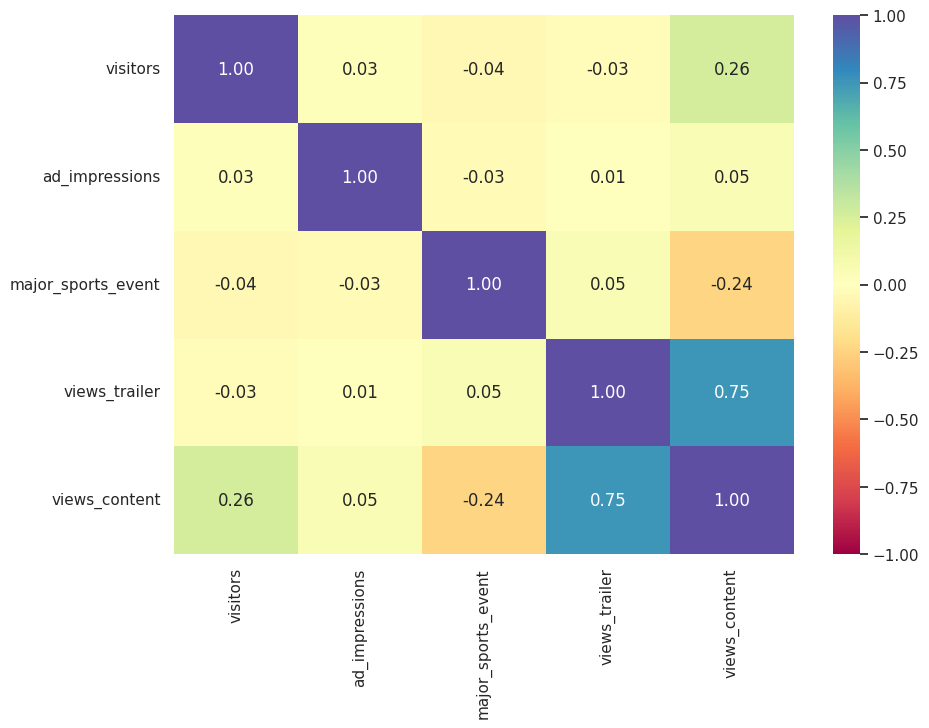

In [19]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(10, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Insights

* views_trailer and views_content are positively correlated.
* major_sports_event and views_content are slightly negatively correlated.
* visitors and views_content are slightly positively correlated.



###**Key Question 3: The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

**views_content vs dayofweek**

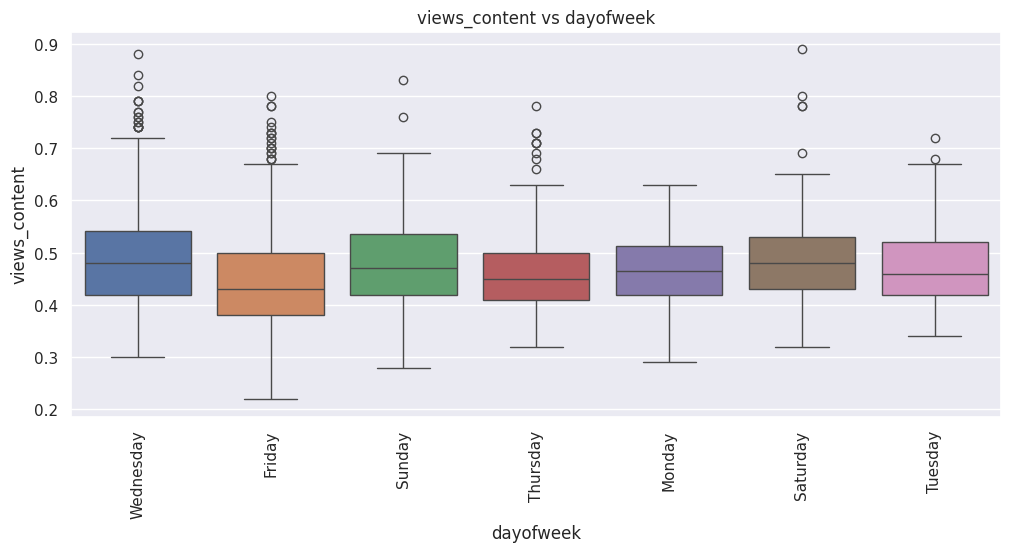

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="dayofweek", y="views_content",hue="dayofweek")
plt.xticks(rotation=90)
plt.title("views_content vs dayofweek")
plt.show()

**views_content vs genre**

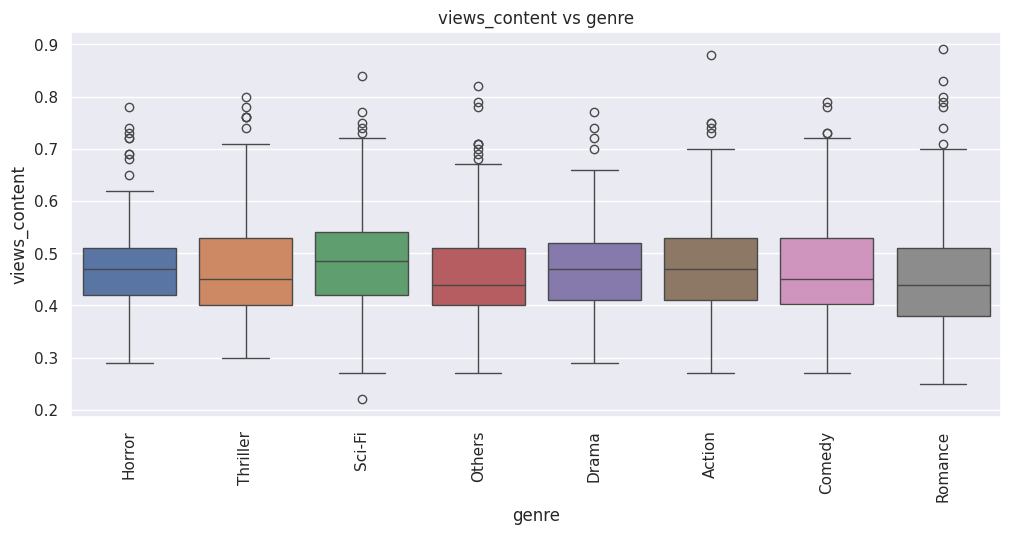

In [21]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="genre", y="views_content",hue="genre")
plt.xticks(rotation=90)
plt.title("views_content vs genre")
plt.show()

###**Key Question 4: How does the viewership vary with the season of release?**

**views_content vs season**

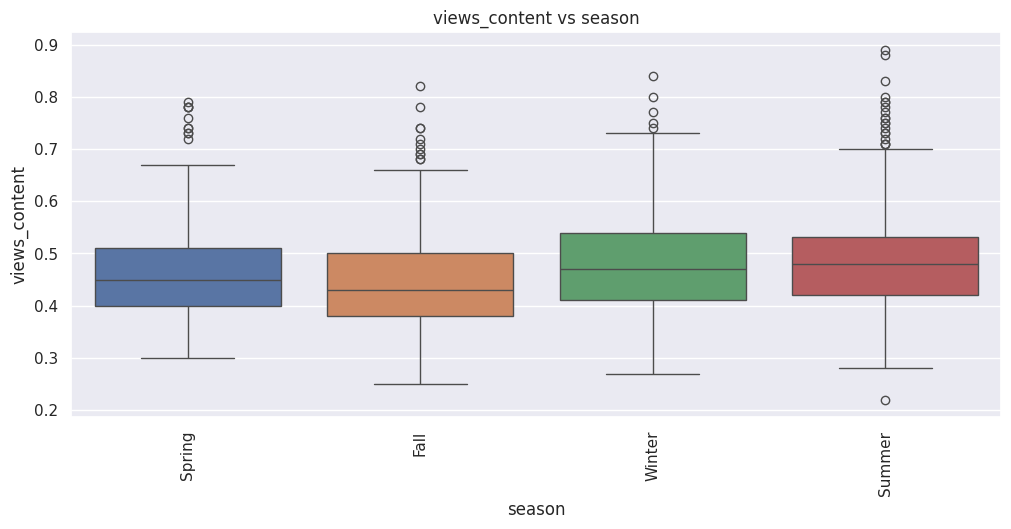

In [22]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="season", y="views_content",hue="season")
plt.xticks(rotation=90)
plt.title("views_content vs season")
plt.show()

###**Key Question 5: What is the correlation between trailer views and content views?**

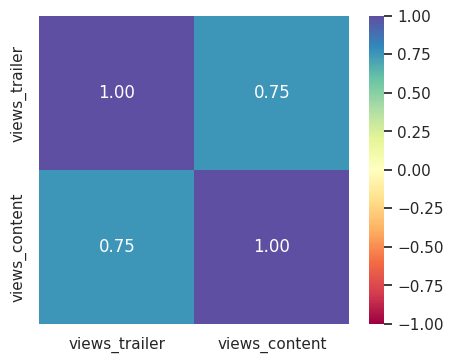

In [23]:
plt.figure(figsize=(5, 4))
sns.heatmap(
    df[['views_trailer','views_content']].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [24]:
df[['views_trailer','views_content']].corr()

,views_trailer,views_content
views_trailer,1.000000,0.753962
views_content,0.753962,1.000000


## Data Preprocessing

### Missing Value Treatment

In [25]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

###Data Duplicates

In [26]:
df.duplicated().sum()

0

###Statistical Summary

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [28]:
df1 = df.copy()

### Outlier Detection

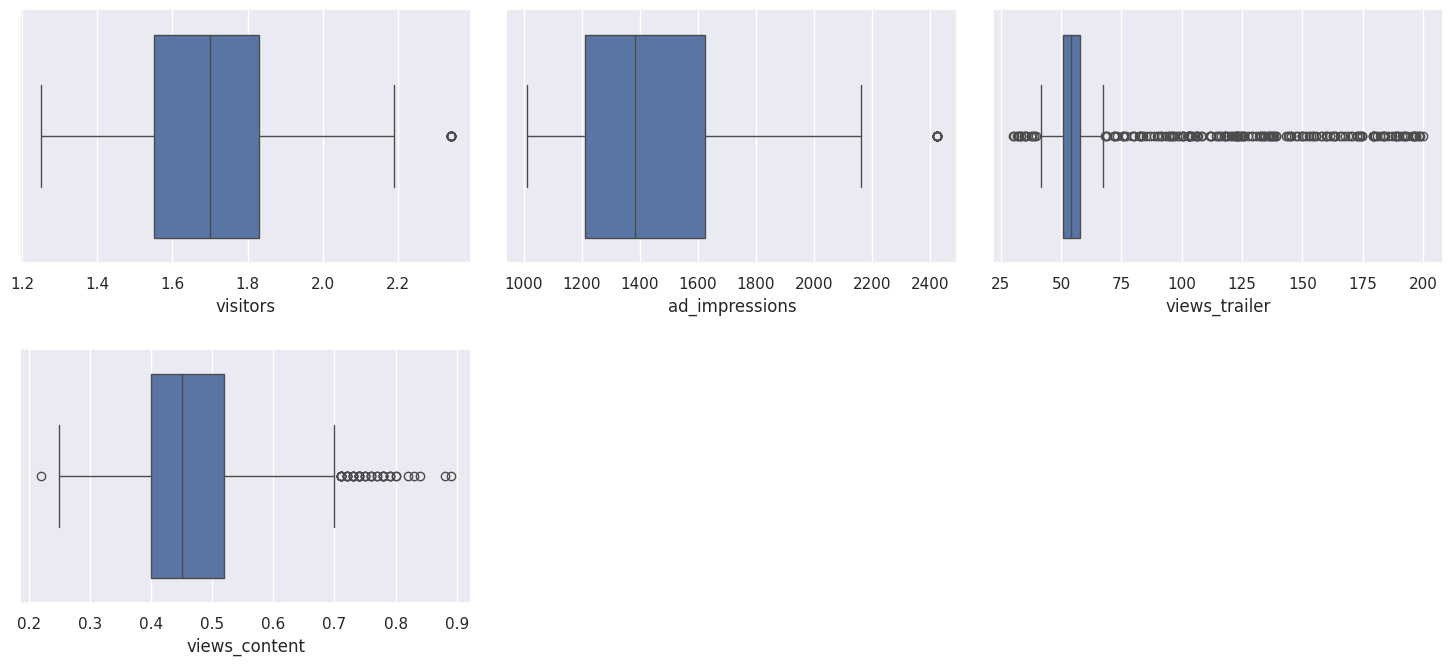

In [29]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(2)
plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [38]:
num_cols

['visitors', 'ad_impressions', 'views_trailer', 'views_content']

In [31]:
Q1 = df1['views_trailer'].quantile(0.25)
Q3 = df1['views_trailer'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [32]:
outliers = df1[(df1['views_trailer'] < lower_bound) | (df1['views_trailer'] > upper_bound)]


In [74]:
df

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
13,1.55,1010.87,1,Drama,Friday,Winter,190.02,0.57
16,1.85,1590.19,0,Thriller,Wednesday,Fall,195.31,0.74
18,1.79,1686.75,1,Sci-Fi,Saturday,Winter,161.56,0.65
22,1.41,1383.58,0,Comedy,Saturday,Summer,192.32,0.78
27,1.59,1172.70,1,Sci-Fi,Thursday,Winter,124.43,0.59
...,...,...,...,...,...,...,...,...
987,2.14,1629.94,0,Romance,Saturday,Summer,182.33,0.89
992,1.57,1383.58,0,Thriller,Friday,Summer,104.37,0.57
994,1.46,1342.77,0,Action,Wednesday,Summer,122.57,0.60
996,1.34,1329.48,0,Action,Friday,Summer,72.42,0.56


- There are a few outliers in the data
- We can cap the outliers using IQR.

In [33]:
# Treat outliers
df1['views_trailer'] = df1['views_trailer'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)




*   However, we will not treat them as they are proper values. And we don't have information from a subject matter expert.



### Data Preparation for Modeling

- We want to predict the first-day viewership
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [30]:
data=df.copy()

In [31]:
# defining X and y variables
X = data.drop(["views_content"], axis=1)
y = data["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  major_sports_event     genre  dayofweek  season  \
0      1.67         1113.81                   0    Horror  Wednesday  Spring   
1      1.46         1498.41                   1  Thriller     Friday    Fall   
2      1.47         1079.19                   1  Thriller  Wednesday    Fall   
3      1.85         1342.77                   1    Sci-Fi     Friday    Fall   
4      1.46         1498.41                   0    Sci-Fi     Sunday  Winter   

   views_trailer  
0          56.70  
1          52.69  
2          48.74  
3          49.81  
4          55.83  
0    0.51
1    0.32
2    0.39
3    0.44
4    0.46
Name: views_content, dtype: float64


In [32]:
# let's add the intercept to data
X = sm.add_constant(X)

In [33]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0,56.70,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.0,1.46,1498.41,1,52.69,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.0,1.47,1079.19,1,48.74,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.0,1.85,1342.77,1,49.81,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.0,1.46,1498.41,0,55.83,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [34]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [39]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


## Model Building - Linear Regression

In [37]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        01:22:54   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.785**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **0.0602**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `visitors` is **0.1295**.

In [40]:
olsmodel.params

const                  0.060157
visitors               0.129451
ad_impressions         0.000004
major_sports_event    -0.060326
views_trailer          0.002330
genre_Comedy           0.009352
genre_Drama            0.012625
genre_Horror           0.009862
genre_Others           0.006325
genre_Romance          0.000551
genre_Sci-Fi           0.013143
genre_Thriller         0.008708
dayofweek_Monday       0.033662
dayofweek_Saturday     0.057887
dayofweek_Sunday       0.036321
dayofweek_Thursday     0.017289
dayofweek_Tuesday      0.022837
dayofweek_Wednesday    0.047376
season_Spring          0.022602
season_Summer          0.044203
season_Winter          0.027161
dtype: float64

In [41]:
# Extracting coefficients from olsmodel.params and rounding to 3 decimals
coefficients = olsmodel.params.round(3)

# Creating a DataFrame with 'Variables' and 'Coefficient Estimate' columns
model_coeff = pd.DataFrame({
    'Variables': coefficients.index,
    'Coefficient Estimate': coefficients.values
})

# Printing the DataFrame to display the results
print(model_coeff)


              Variables  Coefficient Estimate
0                 const                 0.060
1              visitors                 0.129
2        ad_impressions                 0.000
3    major_sports_event                -0.060
4         views_trailer                 0.002
5          genre_Comedy                 0.009
6           genre_Drama                 0.013
7          genre_Horror                 0.010
8          genre_Others                 0.006
9         genre_Romance                 0.001
10         genre_Sci-Fi                 0.013
11       genre_Thriller                 0.009
12     dayofweek_Monday                 0.034
13   dayofweek_Saturday                 0.058
14     dayofweek_Sunday                 0.036
15   dayofweek_Thursday                 0.017
16    dayofweek_Tuesday                 0.023
17  dayofweek_Wednesday                 0.047
18        season_Spring                 0.023
19        season_Summer                 0.044
20        season_Winter           

In [44]:
#Train Predictions
predicted_train = olsmodel.predict(x_train)
predicted_train

731    0.452102
716    0.679675
640    0.431537
804    0.562329
737    0.552069
         ...   
767    0.420539
72     0.498617
908    0.386298
235    0.557111
37     0.484083
Length: 700, dtype: float64

In [45]:
r2_score(y_train,predicted_train)

0.7916159503542447

79% of the variation in the rating is explained by the predictors in the model for train set

In [46]:
#Test Predictions
predicted_test = olsmodel.predict(x_test)
predicted_test

507    0.472532
818    0.439463
452    0.695031
368    0.502594
242    0.480877
         ...   
459    0.433206
415    0.403381
61     0.775798
347    0.405409
349    0.542766
Length: 300, dtype: float64

In [47]:
r2_score(y_test,predicted_test)

0.766446739728833

### Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [48]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [49]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [50]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


**Observations**

- The training $R^2$ is 0.79, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict first-day viewership within a mean error of 0.04 on the test data

- MAPE of 9.03 on the test data means that we are able to predict within 9% of the first-day viewership.

## Conclusion

- We have seen how to build a linear regression model, how to predict the first-day viewership using various factors, and how to check the model's performance.

- Next, we have to check the statistical validity of our model. For this, we will check if the model satisfies the assumptions of linear regression. Only then we will be able to make inferences from it.

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [52]:
vif_df = checking_vif(x_train)
vif_df

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,major_sports_event,1.065689
4,views_trailer,1.023551
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


In [53]:
vif_df.sort_values (by = 'VIF', ascending = False)

,feature,VIF
0,const,99.679317
8,genre_Others,2.573779
6,genre_Drama,1.926699
11,genre_Thriller,1.921001
5,genre_Comedy,1.917635
7,genre_Horror,1.904460
10,genre_Sci-Fi,1.863473
9,genre_Romance,1.753525
20,season_Winter,1.570338
19,season_Summer,1.568240


* Except for the constant term, all other features have VIF values below 5, suggesting that multicollinearity is not a significant issue for these predictors.
* The highest VIF among the predictors is for "genre_Others" (2.573779), which is within acceptable limits.
* This means the predictors are relatively independent, and the regression coefficients should be reliable.
* We will ignore the VIF values for dummy variables and the constant (intercept)

**Now we'll check the rest of the assumptions on *olsmodel*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [54]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
731,0.40,0.452102,-0.052102
716,0.70,0.679675,0.020325
640,0.42,0.431537,-0.011537
804,0.55,0.562329,-0.012329
737,0.59,0.552069,0.037931


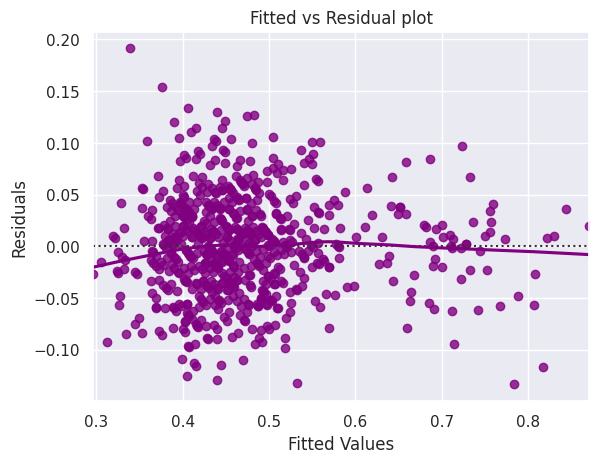

In [55]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

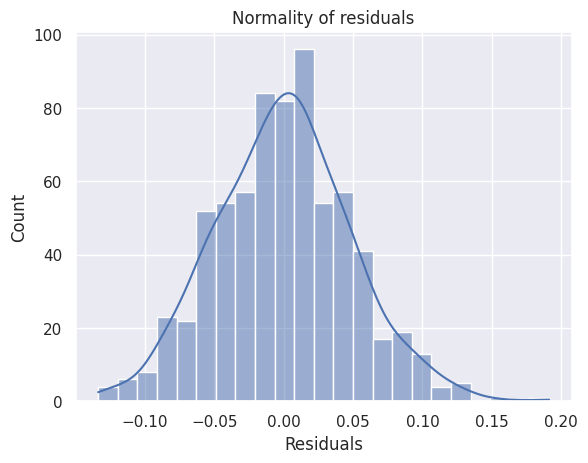

In [56]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

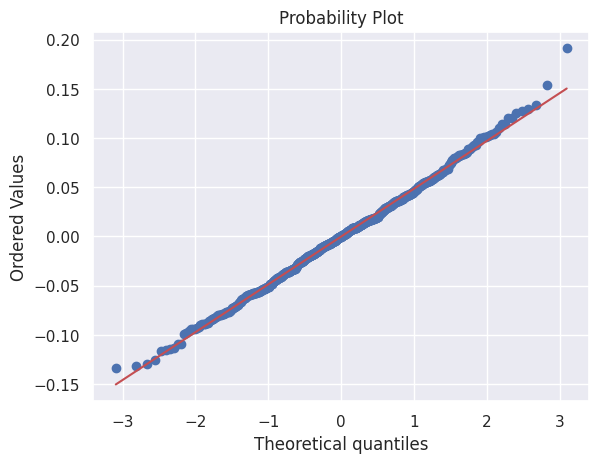

In [57]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails so Residuals are normally distributed.
- Let's check the results of the Shapiro-Wilk test.

In [58]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9972294569015503, pvalue=0.2841978669166565)

H0- Data normal

H1- Data not normal

- Since p-value > 0.05, the residuals are  normal as per the Shapiro-Wilk test.

- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [59]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train)
lzip(name, test)

[('F statistic', 1.1444079593563594), ('p-value', 0.1108677095752728)]

H0- Homo

H1- Hetero

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [60]:
# predictions on the test set
pred = olsmodel.predict(x_test)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.426711
194,0.51,0.504597
314,0.48,0.428738
429,0.41,0.497126
267,0.41,0.477189
746,0.68,0.682308
186,0.62,0.592260
964,0.48,0.503956
676,0.42,0.482031
320,0.58,0.567858


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [61]:
x_train_final = x_train.copy()
x_test_final = x_test.copy()

In [62]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Thu, 04 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        00:42:00   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0602    

In [63]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [64]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


* The model is able to explain ~79% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 9% of the first-day viewership

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

In [65]:
olsmodel_final.params

const                  0.060157
visitors               0.129451
ad_impressions         0.000004
major_sports_event    -0.060326
views_trailer          0.002330
genre_Comedy           0.009352
genre_Drama            0.012625
genre_Horror           0.009862
genre_Others           0.006325
genre_Romance          0.000551
genre_Sci-Fi           0.013143
genre_Thriller         0.008708
dayofweek_Monday       0.033662
dayofweek_Saturday     0.057887
dayofweek_Sunday       0.036321
dayofweek_Thursday     0.017289
dayofweek_Tuesday      0.022837
dayofweek_Wednesday    0.047376
season_Spring          0.022602
season_Summer          0.044203
season_Winter          0.027161
dtype: float64

In [66]:
# Extracting coefficients from olsmodel.params and rounding to 3 decimals
coefficients = olsmodel_final.params.round(3)

# Creating a DataFrame with 'Variables' and 'Coefficient Estimate' columns
model_coeff = pd.DataFrame({
    'Variables': coefficients.index,
    'Coefficient Estimate': coefficients.values
})

# Printing the DataFrame to display the results
print(model_coeff)


              Variables  Coefficient Estimate
0                 const                 0.060
1              visitors                 0.129
2        ad_impressions                 0.000
3    major_sports_event                -0.060
4         views_trailer                 0.002
5          genre_Comedy                 0.009
6           genre_Drama                 0.013
7          genre_Horror                 0.010
8          genre_Others                 0.006
9         genre_Romance                 0.001
10         genre_Sci-Fi                 0.013
11       genre_Thriller                 0.009
12     dayofweek_Monday                 0.034
13   dayofweek_Saturday                 0.058
14     dayofweek_Sunday                 0.036
15   dayofweek_Thursday                 0.017
16    dayofweek_Tuesday                 0.023
17  dayofweek_Wednesday                 0.047
18        season_Spring                 0.023
19        season_Summer                 0.044
20        season_Winter           

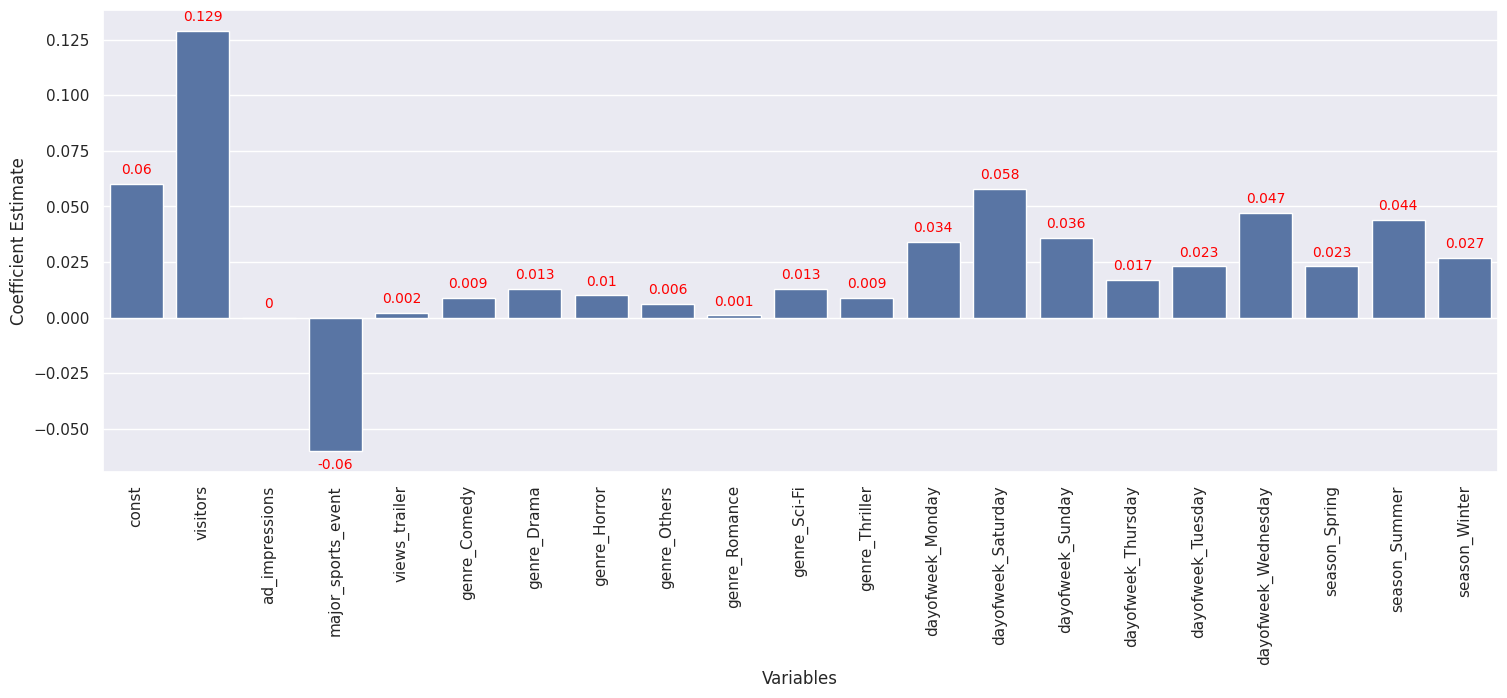

In [67]:
# Visualizing the coefficients
plt.subplots(figsize = (18, 6))
ax = sns.barplot(x = 'Variables', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge', color = 'red', rotation =0, fontsize = 10, padding =5) #matplotlib version is above 3.4
plt.xticks(rotation=90);
plt.show()

In [68]:
for i,j in np.array(olsmodel_final.params.reset_index()):
    print('({}) * {} +'.format(round(j,3),i),end=' ')

(0.06) * const + (0.129) * visitors + (0.0) * ad_impressions + (-0.06) * major_sports_event + (0.002) * views_trailer + (0.009) * genre_Comedy + (0.013) * genre_Drama + (0.01) * genre_Horror + (0.006) * genre_Others + (0.001) * genre_Romance + (0.013) * genre_Sci-Fi + (0.009) * genre_Thriller + (0.034) * dayofweek_Monday + (0.058) * dayofweek_Saturday + (0.036) * dayofweek_Sunday + (0.017) * dayofweek_Thursday + (0.023) * dayofweek_Tuesday + (0.047) * dayofweek_Wednesday + (0.023) * season_Spring + (0.044) * season_Summer + (0.027) * season_Winter + 

## Conclusions and Recommendations

The model is able to explain ~79% of the variation in the data and within 9% of the first-day viewership on the test data, which is good. This indicates that the model is good for prediction as well as inference purposes


**Significant Predictors**
* Visitors: The coefficient for visitors (0.1295, p < 0.0001) is positive and highly significant. This suggests that an increase in the number of visitors strongly correlates with an increase in views on the content.

* Major Sports Event: The coefficient is negative (-0.0603, p < 0.0001), indicating that major sports events tend to reduce views on the content. This insight can help in planning content release schedules to avoid clashing with major sports events to minimize the impact on views.

* Views Trailer: The coefficient for views trailer (0.0023, p < 0.0001) is positive and highly significant. Increasing trailer views can lead to a substantial increase in content views.

* Day of the Week: Several days of the week have significant positive coefficients.This indicates that content views are higher on these days,
especially on weekends.

* Seasons: The coefficients for all seasons (Spring: 0.0226, Summer: 0.0442, Winter: 0.0272) are positive and significant, with Summer having the highest impact.

**Non-Significant Predictors:**
* Ad Impressions: The coefficient for ad impressions (3.623e-06, p = 0.582) is not significant. This suggests that the number of ad impressions does not have a strong direct impact on content views.

* Genres: Most genres (Comedy, Drama, Horror, Others, Romance, Sci-Fi, Thriller) have non-significant coefficients. This indicates that the genre of content does not significantly impact the number of views.


**Key Takeaways for the Business:**
* Focus on Increasing Visitors: Invest in strategies to attract more visitors, as this has the highest impact on content views.

* Avoid Major Sports Events: Schedule important content releases outside of major sports events to avoid viewership dips.

* Promote Trailers: Increase efforts to promote trailers as their views strongly correlate with content views.

* Optimal Release Days: Plan significant content releases or special promotions on Mondays, Wednesdays, Thursdays, Saturdays, and Sundays to maximize viewership.

* Seasonal Planning: Align major content strategies with seasonal trends, focusing on summer for the highest impact.

* Review Ad Strategies: Reassess the current ad impression strategies as they do not show a significant impact on views. Consider optimizing or exploring other advertising methods.








